## **Sytuacja banków na Giełedzie Papierów Wartościowych w 2020 roku**

---

Celem poniższej analizy jest, przy pomocy możliwości języka Python, analizę danych dotyczących sytuacji polskich banków w 2020 roku. Szczególnie zwrócę uwagę na dane z Giełdy Papierów Wartościowych.

<font color='darkblue'> Niebieskiem kolorem opisywać będę poszczególne kroki dotyczące technicznej strony analizy,</font> natomiast kolorem czarnym, opisywał będę swoje spostrzeżenia oraz wnioski wyciągnięte na podstawie danych oraz wykresów.

Kod pisany jest z zamysłem łatwej replikacji dla innych okresów oraz innych interesujących wartości.



Rok 2020 dla banków naznaczony był problemami związanymi z pandemią. Główne była to pogorszona jakość portfela kredytowego spowodowana niższą płynnością w polskich przedsiębiorstwach oraz związane z tym powiększenie rezerw.

Poza pandemią banki uporać musiały uporać się z innymi problemami, które z pewnością będą miały wpływ na ich wycenę - podatek bankowy, problem z kredytami frankowymi i bliskie zera stopy procentowe.

## Dane z GPW
<font color = 'darkblue'>Pierwszym krokiem w mojej analzie będzie pobranie i wyczyszczenie danych. Źródłem danych dla cen akcji na GPW będzie stooq.pl. Posłuży do tego funkcja pobierająca dane dla wybranych symboli w określonym przedziale czasowym.

Funckja tworzyć będzie słownik, w której kluczem będzie symbol, a wartością DataFrame z danymi. </font>

In [ ]:
import numpy as np
import pandas as pd

def GPWdata(symbol: list, start: str, end: str):
  global gpw
  gpw = {}
  import pandas as pd
  for x in symbol:
    gpw["{}".format(x)] = pd.read_csv("https://stooq.pl/q/d/l/?s=" + x + "&d1=" + start + "&d2=" + end + "&i=d")
  return 'stworzono gpw'

<font color = 'darkblue'>Przykładowo dane dla PKO BP i Pekao SA.

In [ ]:
GPWdata(['PKO', 'PEO'], '20191201', '20210112')

'stworzono gpw'

In [ ]:
gpw

{'PEO':            Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie  Wolumen
 0    2019-12-02    103.60     104.05      99.80       99.80   774722
 1    2019-12-03    100.00     100.75      96.80       96.80  1234117
 2    2019-12-04     96.80      98.68      96.34       96.34  1210726
 3    2019-12-05     96.50      98.40      95.20       97.24  1087054
 4    2019-12-06     97.00      97.00      95.34       95.52   628255
 ..          ...       ...        ...        ...         ...      ...
 271  2021-01-05     61.42      62.90      61.00       62.24   786587
 272  2021-01-07     63.56      66.00      63.50       66.00  1508738
 273  2021-01-08     66.00      70.10      65.80       68.56  1864856
 274  2021-01-11     68.58      72.30      68.16       70.02  2325335
 275  2021-01-12     70.50      70.82      68.00       68.62   873763
 
 [276 rows x 6 columns],
 'PKO':            Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie  Wolumen
 0    2019-12-02     36.31      36.69      35.95 

Dane w takiej postaci nie są szczególnie przydatne. Poniższa funkcja przeniesie nam potrzebne kolumny ze struktury słownika do jednego dataframe'u.

In [ ]:
#argumentem funkcji będą dane w postaci słownika stworzonego w poprzednim kroku oraz interesujące nas kolumny - może to być jedna kolumna lub kilka w postaci listy 
def GPWdata_merger(data:dict, cols: list or str):
  import pandas as pd
  global gpw_merged
  from functools import partial, reduce
  cols = [cols] if isinstance(cols, str) else cols
  l = ['Data'] + cols 
  for i in data:
    data[i] = data[i][l]
  my_reduce = partial(pd.merge, on='Data', how='outer')
  gpw_merged = reduce(my_reduce, data.values())

  colnames = []
  for i in list(data.keys()):
    for x in cols:
      colnames.append(i + "_" + x)

  gpw_merged.columns=["Data"] + colnames
  gpw_merged = gpw_merged.set_index('Data')
  gpw_merged.index = pd.to_datetime(gpw_merged.index) 
  
  return 'Stworzono "gpw_merged" '

Dane na których chcę się oprzeć to ceny akcji z zamknięcia sesji oraz wolumen danego dnia, czyli liczba akcji która zmieniła danego dnia właściciela.

In [ ]:
GPWdata_merger(data = gpw, cols = ['Zamkniecie', 'Wolumen'])

'Stworzono "gpw_merged" '

In [ ]:
gpw_merged.tail(5)

,PKO_Zamkniecie,PKO_Wolumen,PEO_Zamkniecie,PEO_Wolumen
Data,,,,
2021-01-05,29.58,2582202,62.24,786587
2021-01-07,31.78,3696175,66.00,1508738
2021-01-08,32.65,3822656,68.56,1864856
2021-01-11,32.75,3558783,70.02,2325335
2021-01-12,32.00,2456496,68.62,873763


Zobaczmy jak kształtowała się cena i sprzedaż na indeksie WIG-Banki.

In [ ]:
GPWdata(["WIG_BANKI"], '20071201', '20210112')
GPWdata_merger(data = gpw, cols = ['Zamkniecie', 'Wolumen'])

'Stworzono "gpw_merged" '

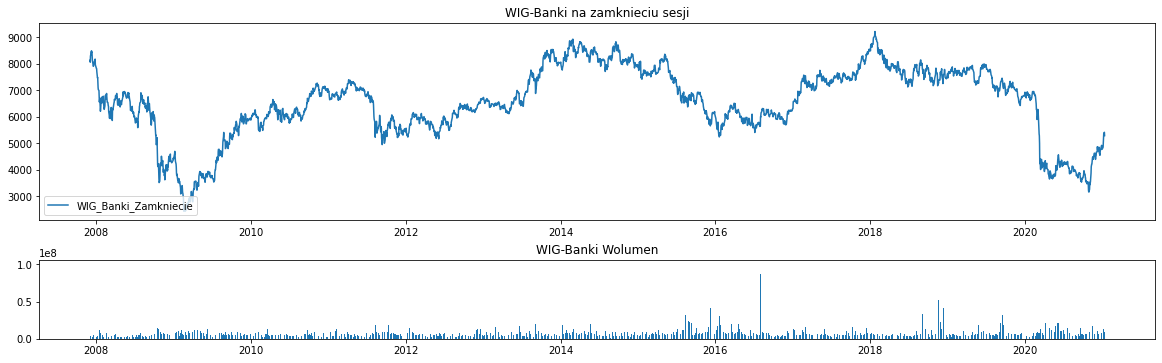

In [ ]:
import matplotlib.pyplot as plt

top1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=4)
top1.plot(gpw_merged.index, gpw_merged['WIG_BANKI_Zamkniecie'], label='WIG_Banki_Zamkniecie')
plt.title('WIG-Banki na zamknieciu sesji')
plt.legend(loc=3)
bottom1 = plt.subplot2grid((4, 4), ( 2,0), rowspan=1, colspan=4)
bottom1.bar(gpw_merged.index, gpw_merged['WIG_BANKI_Wolumen'])
plt.title('WIG-Banki Wolumen')
plt.gcf().set_size_inches(20, 8)
plt.subplots_adjust(hspace=0.5)


Wartość indeksu do marca trzymała się na stabilnym poziomie. Wraz z coraz realnijeszym pojawieniem się wirusa w Polsce, indeks spadał, by wkrótce osiągnąć poziom najniższy od roku 2009. Widać, że obrót całym indeksie był wyższy niż w poprzednich okresach.

Spójrzmy teraz na te dane w okresie ostatniego roku.

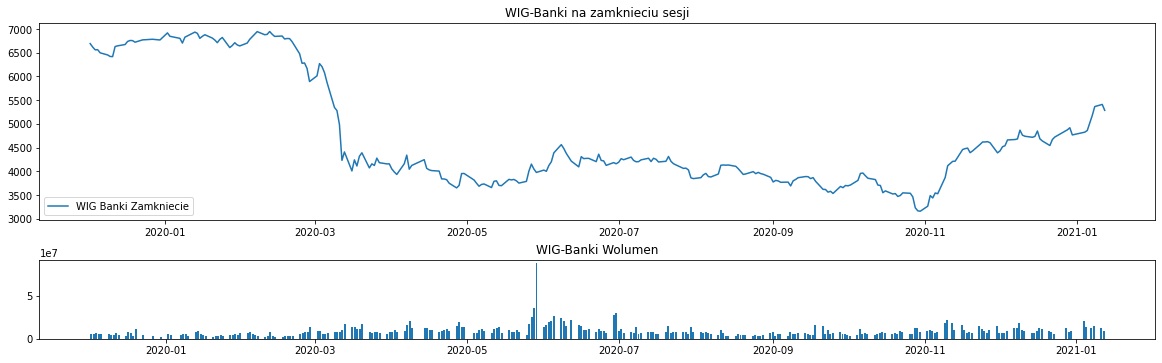

In [ ]:
GPWdata(["WIG_BANKI"], '20191201', '20210112')
GPWdata_merger(data = gpw, cols = ['Zamkniecie', 'Wolumen'])
top1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=4)
top1.plot(gpw_merged.index, gpw_merged['WIG_BANKI_Zamkniecie'], label='WIG Banki Zamkniecie')
plt.title('WIG-Banki na zamknieciu sesji')
plt.legend(loc=3)
bottom1 = plt.subplot2grid((4, 4), ( 2,0), rowspan=1, colspan=4)
bottom1.bar(gpw_merged.index, gpw_merged['WIG_BANKI_Wolumen'])
plt.title('WIG-Banki Wolumen')
plt.gcf().set_size_inches(20, 8)
plt.subplots_adjust(hspace=0.5)

Bardzo duży spadek w marcu spowodowany był ogólną niepewnością oraz ruchami RPP w kwestii stóp procentowych. Z perspektywy potencjalnych inwestorów sytuacja była raczej prosta - niższe stopy procentowe to niższe przychody odsetkowe. Prawdopodobieństwo wypłaty dywidendy także znacznie zmalało, co niedługo potem potwierdziły zalecenia KNF w tej kwestii.

Sprawdźmy jednak, jak indeks bankowy zachowywał się w stosunku całej giełdy, czyli indeksu WIG.

In [ ]:
GPWdata(["WIG_BANKI", "WIG"], '20191201', '20210112')
GPWdata_merger(data = gpw, cols = ['Zamkniecie'])

'Stworzono "gpw_merged" '

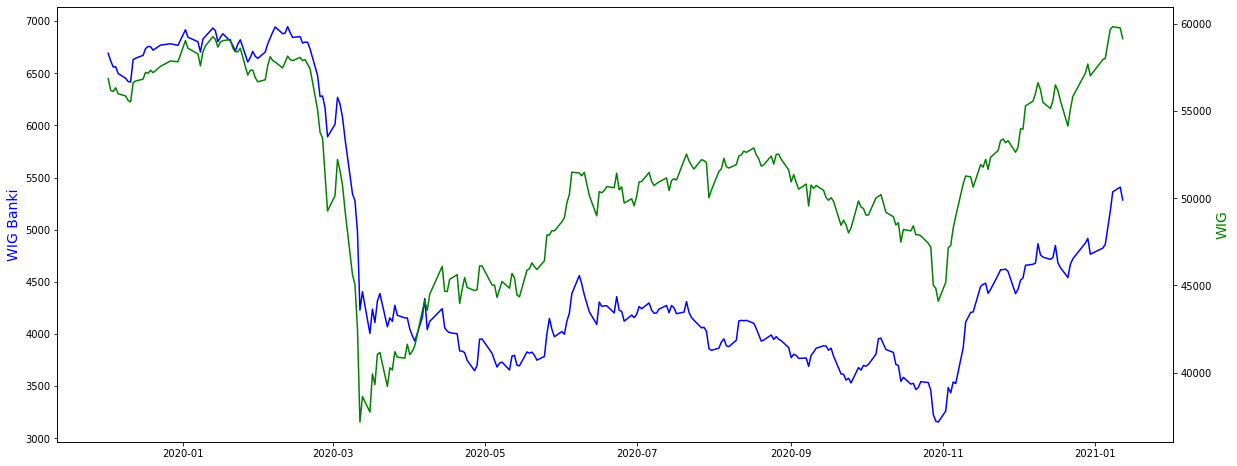

In [ ]:
fig,ax = plt.subplots()

ax.plot(gpw_merged.index, gpw_merged.WIG_BANKI_Zamkniecie, color="blue")

ax2=ax.twinx()

ax2.plot(gpw_merged.index, gpw_merged.WIG_Zamkniecie,color="green")

plt.gcf().set_size_inches(20, 8)
ax.set_ylabel('WIG Banki', color='b', fontsize = 14)
ax2.set_ylabel('WIG', color='g',fontsize = 14)
fig.show()

Pierwsza reakcja rynku na początek pandemii na przełomie lutego i marca mocniej widoczne były na szerokim indeksie WIG - możliwe, że rynek wierzył w silną pozycję banków. Wkrótce jednak to sektor bankowy, stanowiący największy sektor pod względem kapitalizacji na GPW, ciągnął WIG w dół. Możliwe, że na tą delikatnie opóźnioną reakcję złożyły się spadające stopy procentowe.

Sektor bankowy jest bardzo podatny na sytuację finansową "przeciętnego Polaka". W strukturze aktywów znajdują się zarówno pożyczki gotówkowe i kredyty hipoteczne, ale również wierzytelności leasingowe, których jakość bardzo mocno zależy od sytuacji sektora MŚP. Obostrzenia i zakazy działalności dla wielu branż bardzo dobrze widać na wykresie - spadki wiosną, delikatna fala optymizmu w czasie trzeciego kwartału i znów spadki wczesną jesienią, z bardzo dużym przyrostem wraz z początkiem listopada. Wtedy docierały do nas pierwsze informacje o szybszych niż wcześniej postępach w opracowaniu szczepionek. Coraz bardziej prawdopodobna stała się wizja rozpoczęcia szczepień jeszcze w 2020 roku.

## Dane o rozwoju epidemii

Sprawdźmy czy kolejne doniesienia o nowych przypadkach i zgonach spowodowanych Covid-19 wpływały na nastroje inwestorów.

<font color = 'darkblue'> Dostęp do danych o postępie epidemii w Polsce nie jest tak łatwy jak mogło by się to wydawać. Rząd nie udostępnia oficjalnych danych do łatego pobrania. Dane pozyskamy z arkusza Google prowadzonego przez Michała Rogalskiego.

In [ ]:
# link do danych - https://docs.google.com/spreadsheets/d/1ierEhD6gcq51HAm433knjnVwey4ZE5DCnu1bW7PRG3E/edit#gid=1309014089

import datetime
sheet_id = "1ierEhD6gcq51HAm433knjnVwey4ZE5DCnu1bW7PRG3E"
sheet_name = "Wzrost"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

covid_data = pd.read_csv(url)[['Data', 'Nowe przypadki', 'Nowe zgony']]
# dane o dacie mamy w niestandardowym formacie - brakuje informacji o roku
# wiemy jednak, że pierwsza informacja pochodzi z roku 2020
# dodatkowo, dane są dzienne - informacje podawane są także w weekendy i święta
# dlatego wartość 31.12 zawsze stanowić będzie koniec roku - na tej podstawie możemy ustalić konkretną datę
covid_data.loc[covid_data['Data'] == 31.12, 'year'] = covid_data.groupby("Data").cumcount()+2020
covid_data['year'] = covid_data['year'].fillna(method = 'bfill').fillna(covid_data['year'].max() + 1).astype(int).astype(str)
covid_data['Data'] = covid_data['Data'].astype(str)
covid_data['Data'] = covid_data['Data'].replace(to_replace='^(\d+\.\d+)\.\d+', value=r'\1', regex=True)\
    .astype('float').map('{:,.2f}'.format)
covid_data[['day', 'month']] = covid_data['Data'].str.split('.', 1, expand=True)
covid_data['Data'] = pd.to_datetime(covid_data[['year', 'month', 'day']]) 
covid_data = covid_data.set_index('Data')
covid_data['Nowe przypadki'] = covid_data['Nowe przypadki'].str.replace('\+ ', '').astype(int)
covid_data['Nowe zgony'] = covid_data['Nowe zgony'].str.replace('\+ ', '').astype(int)
covid_data = covid_data[[ 'Nowe przypadki', 'Nowe zgony']]

#covid_data.to_csv('data.csv')
covid_data

,Nowe przypadki,Nowe zgony
Data,,
2020-03-03,0,0
2020-03-04,1,0
2020-03-05,0,0
2020-03-06,4,0
2020-03-07,1,0
...,...,...
2021-02-17,8694,279
2021-02-18,9073,273
2021-02-19,8777,241


In [ ]:
# łączymy zbiory danych odnośnie epidemii i danych
df = covid_data.merge(gpw_merged, how = 'left', on = 'Data')
# notowania giełdy i wartości indeksów dostępne są tylko dla dni roboczych, dlatego wartości na dni bez wartości przeciągniemy z poprzednich okresów
# w ten sposób unikniemy 'dziur' w wykresie
df[['WIG_BANKI_Zamkniecie', 'WIG_Zamkniecie']] = df[['WIG_BANKI_Zamkniecie', 'WIG_Zamkniecie']].ffill()

df = df.loc['2019-12-01':'2021-01-12']

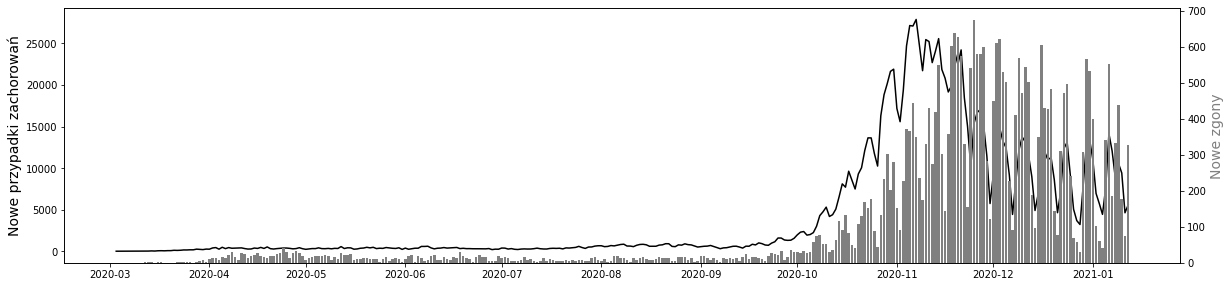

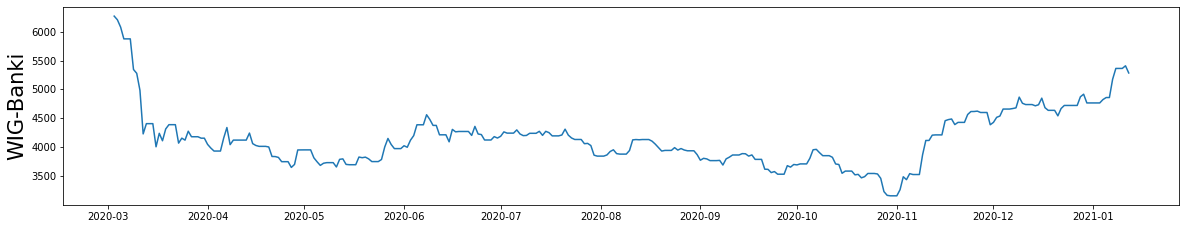

In [ ]:
top1 = plt.subplot2grid((5, 4), (0, 0), rowspan=3, colspan=4)
g = plt.figure(1)
fig,ax = plt.subplots()

top1.plot(df.index, df['Nowe przypadki'], color = 'black')
g.set_size_inches(20, 8)
ax2 = top1.twinx()
ax2.bar(df.index, df['Nowe zgony'],color="grey")
top1.set_ylabel('Nowe przypadki zachorowań', color='black', fontsize = 14)
ax2.set_ylabel('Nowe zgony', color='grey',fontsize = 14)
bottom1 = plt.subplot2grid((4, 4), ( 2,0), rowspan=2, colspan=4)
bottom1.plot(df.index, df['WIG_BANKI_Zamkniecie'])
bottom1.set_ylabel('WIG-Banki', fontsize = 21)


plt.gcf().set_size_inches(20, 8)
plt.subplots_adjust(hspace=0.5)



Po pierwszych spadkach, spowodowanych doniesnieniami z innych krajów oraz ogłoszaszanymi obosztrzeniami, od czerwca widać delikatną poprawę nastrojów. Nie widać dużych różnic w ilościach wykrywanych przypadków, ale zmniejszyły się ilości przypadków zgonów. Największe przyrosty chorych pokrywają się także z najgorszymi wartościami indeksu. Początek listopada - gdy dzienna liczba pozytywnych testów na Covid19 w Polsce znacznie przewyższała 20 tysięcy, indeks spadł poniżej 3500, do najniższej wartości w tym wieku. 

## Stopy procentowe
Sprawdźmy teraz jak prezentowały się stopy procentowe w tym czasie.

Pozsłużą nam do tego dane udostępniane przez NBP udostępniane w formie pliku XML. Aby pobrać potrzebne dane w formie tabeli, musimy przy użyciu pętli przechodzić przez kolejne gałęzie pliku.

In [ ]:
import xml.etree.ElementTree as etree
import urllib
import requests


url = "https://www.nbp.pl/xml/stopy_procentowe_archiwum.xml"
response = urllib.request.urlopen(url)
tree = etree.parse(response)

root = tree.getroot()
#tworzymy DataFrame do odkładania danych
columns = ["obowiazuje_od", "nazwa", "wartosc"]
dataframe = pd.DataFrame(columns = columns)

#pobieramy datę początku obowiązywania nowej stopy
for node in root:
  obowiazuje_od = node.attrib.get("obowiazuje_od")
# a w drugim kroku sięgamy głębiej - po nazwę stopy i wartość
  for node2 in node:
    nazwa = node2.attrib.get("id")
    wartosc = node2.attrib.get("oprocentowanie")
    dataframe = dataframe.append(pd.Series([obowiazuje_od, nazwa, wartosc], index = columns), ignore_index = True)

# wartości z kolumny id przerzucamy do kolumn, rozciągając tabelę
stopy_procentowe = pd.pivot_table(dataframe, values='wartosc', index= 'obowiazuje_od',
                    columns=['nazwa'], aggfunc=np.sum)

# zmieniamy nazwy kolumn
stopy_procentowe = stopy_procentowe.rename(columns = {'dep' : 'NBP_depozytowa', "dys":"NBP_dyskontowa", "lom":"NBP_lombardowa", "red":"NBP_redyskontowa", "ref":"NBP_referencyjna" })
# niech data zostanie indexem tabeli
stopy_procentowe.index = pd.to_datetime(stopy_procentowe.index)
# zmieniamy formatowanie, aby wartości były trakotowane jako liczby
stopy_procentowe = stopy_procentowe.apply(lambda x: x.str.replace(',', '.').astype(float), axis=1)
stopy_procentowe.tail()

nazwa,NBP_depozytowa,NBP_dyskontowa,NBP_lombardowa,NBP_redyskontowa,NBP_referencyjna
obowiazuje_od,,,,,
2014-10-09,1.0,NaN,3.0,2.25,2.0
2015-03-05,0.5,NaN,2.5,1.75,1.5
2020-03-18,0.5,1.10,1.5,1.05,1.0
2020-04-09,0.0,0.60,1.0,0.55,0.5
2020-05-29,0.0,0.12,0.5,0.11,0.1


Jak widzimy, zmiana stóp w marcu była pierwszą zmianą od ponad 5 lat. W czasie pandemi RPP trzy razy wykorzystywała możliwość zmiany stóp procentowych. Stopa referencyjna spadła z 1,5% do 0,1%. Wkrótce za tym w naturalny sposób w dół poszły oprocentowania kredytów.

<font color = 'darkblue'>Dołączmy teraz dane o stopach do danych o bankach.

In [ ]:
banki_stopy = gpw_merged.merge(stopy_procentowe, left_index= True, right_index= True, how = "left")
banki_stopy = banki_stopy[['WIG_BANKI_Zamkniecie', 'WIG_Zamkniecie','NBP_lombardowa','NBP_redyskontowa', 'NBP_referencyjna']]
banki_stopy.tail()

,WIG_BANKI_Zamkniecie,WIG_Zamkniecie,NBP_lombardowa,NBP_redyskontowa,NBP_referencyjna
Data,,,,,
2021-01-05,4859.01,58027.01,NaN,NaN,NaN
2021-01-07,5175.60,59687.54,NaN,NaN,NaN
2021-01-08,5363.36,59843.23,NaN,NaN,NaN
2021-01-11,5408.93,59772.63,NaN,NaN,NaN
2021-01-12,5284.58,59159.31,NaN,NaN,NaN


<font color = 'darkblue'>Tabela ze stopami nie uwzględnia wszystkich dat, a jedynie daty, w któych stopy były zmieniane. Dane o stopach musimy więc przeciągnąć w dół tabeli.

In [ ]:
banki_stopy[[ 'NBP_lombardowa','NBP_redyskontowa', 'NBP_referencyjna']] = banki_stopy[[ 'NBP_lombardowa','NBP_redyskontowa', 'NBP_referencyjna']].fillna(method='ffill')

banki_stopy

,WIG_BANKI_Zamkniecie,WIG_Zamkniecie,NBP_lombardowa,NBP_redyskontowa,NBP_referencyjna
Data,,,,,
2019-12-02,6692.32,56868.74,NaN,NaN,NaN
2019-12-03,6620.15,56191.17,NaN,NaN,NaN
2019-12-04,6560.79,56123.68,NaN,NaN,NaN
2019-12-05,6563.31,56338.75,NaN,NaN,NaN
2019-12-06,6497.64,55994.68,NaN,NaN,NaN
...,...,...,...,...,...
2021-01-05,4859.01,58027.01,0.5,0.11,0.1
2021-01-07,5175.60,59687.54,0.5,0.11,0.1
2021-01-08,5363.36,59843.23,0.5,0.11,0.1


<font color = 'darkblue'> Teraz weźmy ostatnie dane o stopach sprzed daty początka obserwacji cen akcji, aby uzyskać wysokości stóp dla pierwszych obserwacji w dataframie.

In [ ]:
g = stopy_procentowe.loc[stopy_procentowe.index < min(gpw_merged.index)][-1:]
b= banki_stopy
for x in ['NBP_lombardowa','NBP_redyskontowa', 'NBP_referencyjna']:
  b[x] = banki_stopy[[x]].fillna(g.iloc[0][x])
banki_stopy=b
banki_stopy.head()

,WIG_BANKI_Zamkniecie,WIG_Zamkniecie,NBP_lombardowa,NBP_redyskontowa,NBP_referencyjna
Data,,,,,
2019-12-02,6692.32,56868.74,2.5,1.75,1.5
2019-12-03,6620.15,56191.17,2.5,1.75,1.5
2019-12-04,6560.79,56123.68,2.5,1.75,1.5
2019-12-05,6563.31,56338.75,2.5,1.75,1.5
2019-12-06,6497.64,55994.68,2.5,1.75,1.5


<font color = 'darkblue'> Nałóżmy wykres stopy referencyjnej na wykres indeksu WIG Banki.

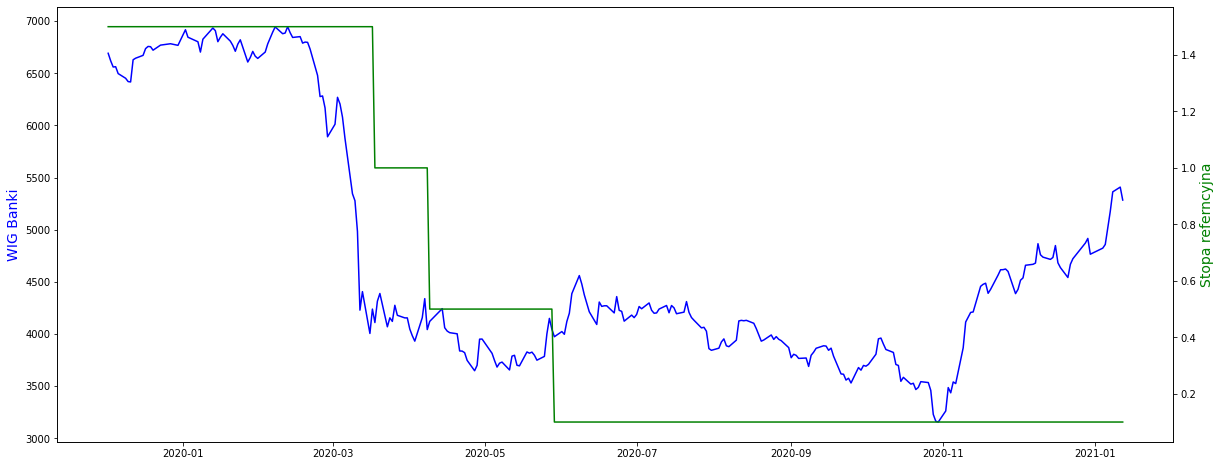

In [ ]:
fig,ax = plt.subplots()

ax.plot(banki_stopy.index, banki_stopy.WIG_BANKI_Zamkniecie, color="blue")
ax2=ax.twinx()
ax2.plot(banki_stopy.index, banki_stopy["NBP_referencyjna"],color="green")
plt.gcf().set_size_inches(20, 8)
ax.set_ylabel('WIG Banki', color='b', fontsize = 14)
ax2.set_ylabel('Stopa referncyjna', color='g',fontsize = 14)
plt.show()

Dla pełniejszej informacji należy dodać, że za politykę stóp procentowych w Polsce odpowiada RPP. W przypadku decyzji o zmianie stóp, nowe stopy procentowe obowiązywać będą już od następnego dnia. Widać jednak, że rynek spodziewał się obniżenia stóp, bo kolejne decyzje nie przynosiły znacznego ruchu na cenach akcji. Stopy procentowe wpłynęły jednak na utrzymanie niskich cen akcji w dłuższym okresie - WIG Banki zdecydownie dłużej, bo aż do listopada utrzymywał relatywnie niski poziom.

Trzeba jednak pamiętać, że niskie stopy procentowe mogły w pewnym stopniu pozytywnie wpływać na kapitalizacje spółek na GPW, w tym banków. 

Niższa konsupcja spowodowała wyższe depozyty w bankach, które przy niskim oprocentowaniu na lokatach i kontach oszczędnościowych, z pewnością w dłuższym terminie przekierowały część oszczędności w kierunku bardziej ryzykownych aktywów, dających potencjalnie lepsze stopy zwroty - takie jak akcje czy fundusze oparte na akcjach.

## Sytuacja na przypadkach wybranych banków
Teraz spójrzmy na przypadki wybranych banków.

<font color = 'darkblue'>Dane pobrać przy użyciu poprzednio stworzonej funkcji 'GPWData'. Aby analiza dawała lepszy obraz, ustandaryzujmy danę przeskalowując dane. Cenę każdej akcji przeindeksujemy, ustawiając pierwotną wartość na 100. Wartości w kolejnych okresach ustalimy proporcjnalnie do pierwszego okresu.

In [ ]:
GPWdata(["PEO", "PKO", "MIL", "ALR", "MBK", "ING"], '20191201', '20210112')
GPWdata_merger(data = gpw,cols = ['Zamkniecie'])
gpw_merged_pct_change = gpw_merged.pct_change()
for column in gpw_merged_pct_change:
  gpw_merged['{}_standarized'.format(column)] = 100 * gpw_merged[column] / gpw_merged[column][0]

In [ ]:
gpw_merged.head(5)

,PEO_Zamkniecie,PKO_Zamkniecie,MIL_Zamkniecie,ALR_Zamkniecie,MBK_Zamkniecie,ING_Zamkniecie,PEO_Zamkniecie_standarized,PKO_Zamkniecie_standarized,MIL_Zamkniecie_standarized,ALR_Zamkniecie_standarized,MBK_Zamkniecie_standarized,ING_Zamkniecie_standarized
Data,,,,,,,,,,,,
2019-12-02,99.80,36.00,5.500,29.42,362.0,188.8,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-12-03,96.80,35.70,5.430,28.46,358.0,190.0,96.993988,99.166667,98.727273,96.736914,98.895028,100.635593
2019-12-04,96.34,34.99,5.490,27.78,358.2,190.8,96.533066,97.194444,99.818182,94.425561,98.950276,101.059322
2019-12-05,97.24,34.77,5.490,27.80,354.8,192.0,97.434870,96.583333,99.818182,94.493542,98.011050,101.694915
2019-12-06,95.52,34.03,5.675,28.14,353.4,191.6,95.711423,94.527778,103.181818,95.649218,97.624309,101.483051


Przenieśmy teraz uzyskane wartości na wykres.

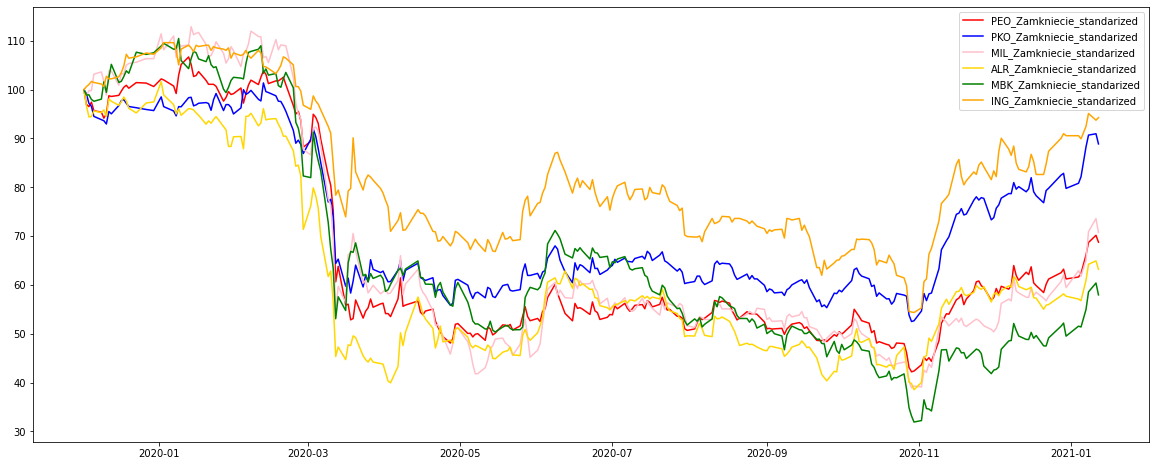

In [ ]:
plt.plot( 'PEO_Zamkniecie_standarized', data=gpw_merged, color = 'red')
plt.plot( 'PKO_Zamkniecie_standarized', data=gpw_merged, color = 'blue')
plt.plot( 'MIL_Zamkniecie_standarized', data=gpw_merged, color = 'pink')
plt.plot( 'ALR_Zamkniecie_standarized', data=gpw_merged, color = 'gold')
plt.plot( 'MBK_Zamkniecie_standarized', data=gpw_merged, color = 'green')
plt.plot( 'ING_Zamkniecie_standarized', data=gpw_merged, color = 'orange')
plt.gcf().set_size_inches(20, 8)
plt.legend()

Pandemia miała duży wpływ na wszystkie bank w podobnym stopniu, jednak na wykresie można dostrzec pewne różnice. Wyjątkowo dobrze przez ostatni rok przeszły ING oraz PKO BP.

Bardzo dobra na tle konkurancji wycena ING może być wynikiem niskiego udziału kredytów opartych na CHF w aktywach. ING po roku w bardzo wymagających warunkach wróciło do wyceny sięgejącej ponad 90% wartości bazowej.

Dobra sytuacja PKO BP może wynikać z pozycji lidera w sektorze i największej bazy klientów. Notowania Pekao SA mogły obciążać problemy w grupie PZU i niewiadomo dotyczącego przejęcia Alior Banku, które zdaniem komentatorów dalej jest prawdopodbne.

Kredyty frankowe negatywnie wpłynęły z pewnością także na Bank Millenium oraz MBank.

Alior Bank swoje problemy miał już znacznie przed pandemią, od czasu przejęcia przez PZU, akcje Aliora systematycznie traciły na wartości - według komentatorów rynku częściowo przez problemy finansowe - złe kredyty korporacyjne i związane z nimi odpisy, a częściowo przez brak pomysłu na przyszłość Aliora wewnątrz grupy PZU.

Powodem zróżnicowania z pewnością mogą być wyniki prezentowane przez poszczególne banki. Sprawdźmy jak na wyceny banków wpłynęły ich wyniki.

<font color='darkblue'>
Dostęp do danych uzyskamy przez stronę bankier.pl. Dane te prezentowane są w formie tabelki na stronie w HTML. Wykorzystamy do tego paczkę BeautifulSoup, która służy do parsowania plików XML i HTML, przez co jest bardzo przydatna do tzw. web-scrappingu.


In [ ]:
def wyniki(symbols : list, year : list):
  #tworzymy docelowy df z kolumnami zgodnie z zawartością strony
  global wyniki_merged
  wyniki_merged = pd.DataFrame(columns=['Przychody z tytułu odsetek i prowizji (tys zł)','Wynika na działaności bankowej (tys. zł)', 'Zysk (strata) brutto (tys. zł)',
                                        'Zysk (strata) netto (tys zł)*', 'Aktywa (tys zł)', 'Kapitał własny (tys. zł)*','kwartał','rok'])
  #dla każdego podanego symbolu kod pobiera dane ze stony i dołącza do naszego dataframe'u
  for  i in symbols:
    url="https://www.bankier.pl/gielda/notowania/akcje/" + i + "/wyniki-finansowe/skonsolidowany/kwartalny/alternatywny"
    from urllib import request
    from bs4 import BeautifulSoup
    #aby nie mieć problemu z polskimi znakami użyjmy kodowania UTF-8
    html_content = request.urlopen(url).read().decode('UTF-8')

    bs=BeautifulSoup(html_content, "lxml")

    col_names = []
    #znajdźmy intersującą nas tabelkę - w naszym wypadku interesuje nas pierwsza tabela w przeszukiwanym dokumencie HTML
    table_head=bs.find('thead')
    rows = table_head.find_all('tr')
    #znajdźmy nagłówki tabelki
    for row in rows:
        cols=row.find_all('th')
        cols=[x.text.strip() for x in cols]
        col_names =  cols
    #zbierzmy dane z tabeli - robimy to w pętli, linia po linii
    lst = []
    table_body=bs.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols=row.find_all('td')
        cols=[x.text.strip().replace("\xa0","") for x in cols]
        lst.append(cols)

    dane_finansowe = pd.DataFrame(lst,columns = col_names)
    dane_finansowe = dane_finansowe.rename(columns={'': 'okres'})

    #podzielmy kolumnę z okresem na osobne kolumny - rok i kwartał
    dane_finansowe[['kwartał','rok']] = dane_finansowe.okres.str.split(" Q ",expand=True,)

    dane_finansowe = dane_finansowe.iloc[ : ,1:]
    #wybieramy tylko dane z listy lat, które podane zostały w argumencie funkcji
    dane_finansowe = dane_finansowe.loc[dane_finansowe['rok'].isin(year) ]
    dane_finansowe['Kwartał'] = dane_finansowe['rok'] + ' ' + dane_finansowe['kwartał']
    dane_finansowe['bank'] = i
    wyniki_merged = wyniki_merged.append(dane_finansowe)
    wyniki_merged[['Przychody z tytułu odsetek i prowizji (tys zł)','Wynika na działaności bankowej (tys. zł)', 'Zysk (strata) brutto (tys. zł)', 'Zysk (strata) netto (tys zł)*', 'Aktywa (tys zł)', 'Kapitał własny (tys. zł)*']] = wyniki_merged[['Przychody z tytułu odsetek i prowizji (tys zł)','Wynika na działaności bankowej (tys. zł)', 'Zysk (strata) brutto (tys. zł)', 'Zysk (strata) netto (tys zł)*', 'Aktywa (tys zł)', 'Kapitał własny (tys. zł)*']].apply(pd.to_numeric)
  print("Stworzono 'wyniki_merged'")


<font color = 'darkblue'>Wykorzystajmy stworzoną funkcję. Potrzebuję ona dwóch argumentów - listy symboli oraz listy z latami

In [ ]:
wyniki(['PKOBP', 'PEKAO', 'MBANK', 'ALIOR', 'INGBSK', 'MILLENNIUM'], year = ['2019', '2020'])

Stworzono 'wyniki_merged'


In [ ]:
wyniki_merged.head(5)

,Przychody z tytułu odsetek i prowizji (tys zł),Wynika na działaności bankowej (tys. zł),Zysk (strata) brutto (tys. zł),Zysk (strata) netto (tys zł)*,Aktywa (tys zł),Kapitał własny (tys. zł)*,kwartał,rok,Kwartał,bank
66,4106000,3418000,1234000,862000,325833000,39739000,I,2019,2019 I,PKOBP
67,4315000,3554000,1729000,1217000,328992000,39634000,II,2019,2019 II,PKOBP
68,4484000,3683000,1669000,1229000,341551000,41045000,III,2019,2019 III,PKOBP
69,3929000,3422000,1187000,723000,348044000,41587000,IV,2019,2019 IV,PKOBP
70,4446000,3498000,797000,503000,364638000,42505000,I,2020,2020 I,PKOBP


<font color = 'darkblue'>Do wizualizacji danych ze sprawozdań, nalepiej sprawdzi się wykres dynamiczny. Da to możliwości podglądu konkretnych wartości dla użytkownika oraz podstawowe filtrowanie przez klikanie w legendę wykresu.

Najpierw dane pobrane z internetu przekształcimy do nieco łatwiejszej do wizulacji formy. Wartości z kolumn przerzucimy do wierszy "wydłużając" tabelę. </font>

In [ ]:
wyniki = wyniki_merged.melt(id_vars=["bank", "Kwartał", 'rok', 'kwartał'], 
        var_name="pozycja", 
        value_name="Wartość")

wyniki.head(5)

,bank,Kwartał,rok,kwartał,pozycja,Wartość
0,PKOBP,2019 I,2019,I,Przychody z tytułu odsetek i prowizji (tys zł),4106000
1,PKOBP,2019 II,2019,II,Przychody z tytułu odsetek i prowizji (tys zł),4315000
2,PKOBP,2019 III,2019,III,Przychody z tytułu odsetek i prowizji (tys zł),4484000
3,PKOBP,2019 IV,2019,IV,Przychody z tytułu odsetek i prowizji (tys zł),3929000
4,PKOBP,2020 I,2020,I,Przychody z tytułu odsetek i prowizji (tys zł),4446000


In [ ]:
import plotly.express as px

fig = px.bar(wyniki.loc[wyniki['pozycja'].isin(['Przychody z tytułu odsetek i prowizji (tys zł)',
                                                'Wynika na działaności bankowej (tys. zł)',
                                                'Zysk (strata) netto (tys zł)*'])], 
             x="pozycja", y="Wartość", barmode="relative",facet_row="bank", facet_col="Kwartał", color = "pozycja", height = 1000)
fig.update_layout(legend=dict(y = -0.1, x = 0))
fig.update_yaxes( title = dict(text =""), nticks = 10, )
fig.update_xaxes(visible=False, showticklabels=True)

fig.show()

*Na dzień 17.02 dane o Q4 2020 dla większości banków nie są dostępne - kod działa jednak dynamicznie i odświeżenie po publikacji danych uwzględni nowe dane.*

Wykres pokazuje jasno, że stopy procentowe miały ostatecznie wpływ na przychody odsetkowe banków, jednak nie w równym stopniu. Pozytywnie na tle pozostałych banków wygląda sytuacja ING - delikatny spadek przychodów w drugim kwartale 2020 i niższy zysk netto, prawdopodbnie spowodowany odpisami. Osiągając przychody na podobnym poziomie jak MBank, ING osiąga znacznie wyższe zyski. Sytuacja dwóch najmniejszych pod względem przychodów banków z wybranego zestawienia, czyli Millennium i Aliora, wygląda na tle pozostałych najgorzej. Alior osiągnał wyjątkową dużą stratę netto w Q2 2020, natomiast zysk Millennium niebezpiecznie zbliżał się do zera. Rozwiązanie rezerw w przyszłym roku może przenieść przeniesienie zysków na przyszły rok, jednak w dużym stopniu jest to zależne od rozwoju epidemii i kondycji gospodarki.